In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
dt = pd.read_csv("diabetes.csv")
dt.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
correlation_matrix = dt.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


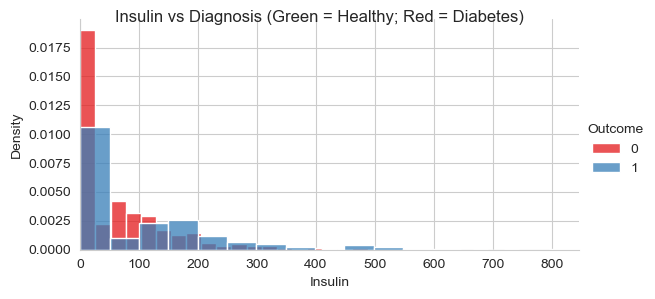

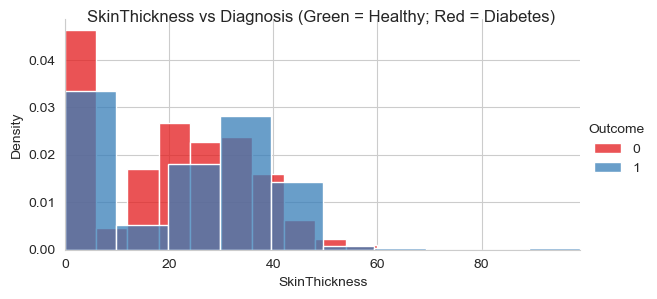

In [28]:
def plotHistogram(values, label, feature, title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label, aspect=2, palette="Set1")
    plotOne.map(sns.histplot, feature, kde=False, stat="density", common_norm=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Density')
    plotOne.fig.suptitle(title)
    plt.show()

plotHistogram(dt, "Outcome", 'Insulin', 'Insulin vs Diagnosis (Green = Healthy; Red = Diabetes)')
plotHistogram(dt, "Outcome", 'SkinThickness', 'SkinThickness vs Diagnosis (Green = Healthy; Red = Diabetes)')

In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

for col in categorical_columns:
    le = LabelEncoder()
    dt[col] = le.fit_transform(dt[col])

print(dt.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6       86             22             28        0  123   
1            1       23             19             22        0   62   
2            8      121             17              0        0   30   
3            1       27             19             16       62   77   
4            0       75              4             28      102  209   

   DiabetesPedigreeFunction  Age  Outcome  
0                       350   29        1  
1                       196   10        0  
2                       368   11        1  
3                        53    0        0  
4                       514   12        1  


In [36]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(dt)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


   Outcome      Ratio
0      500  65.104167
1      268  34.895833


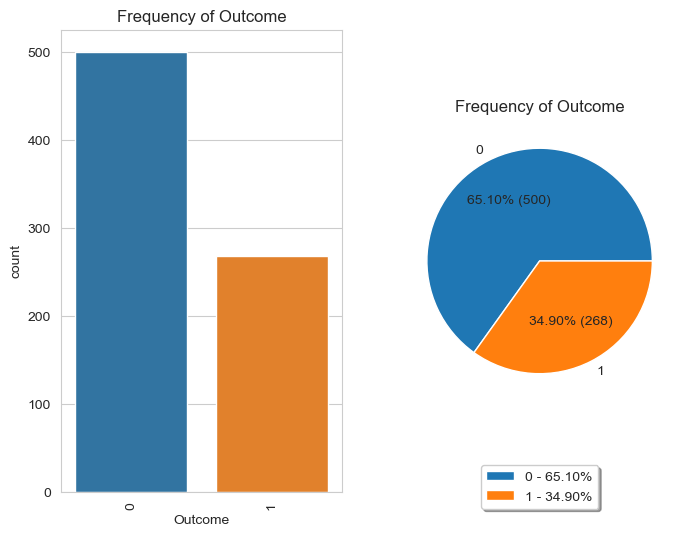

In [40]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(dt, col, True)

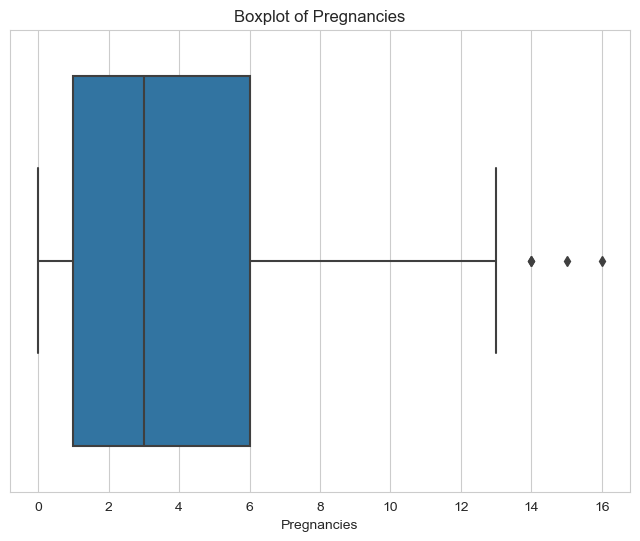

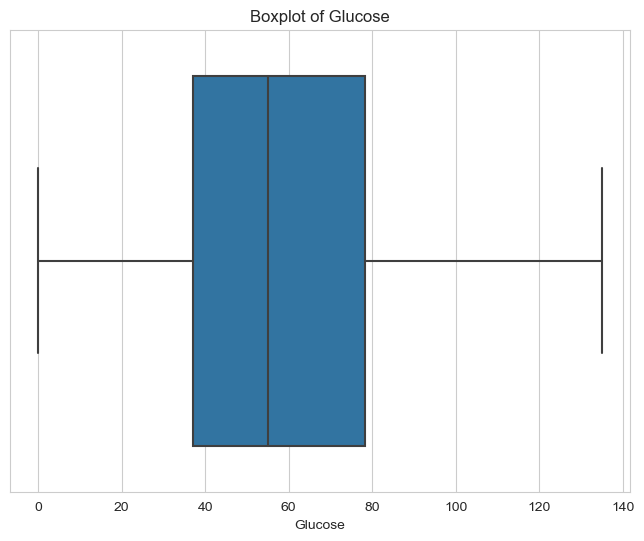

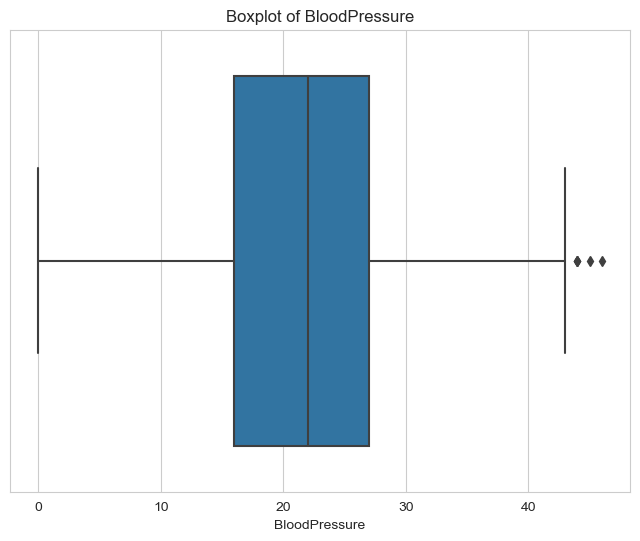

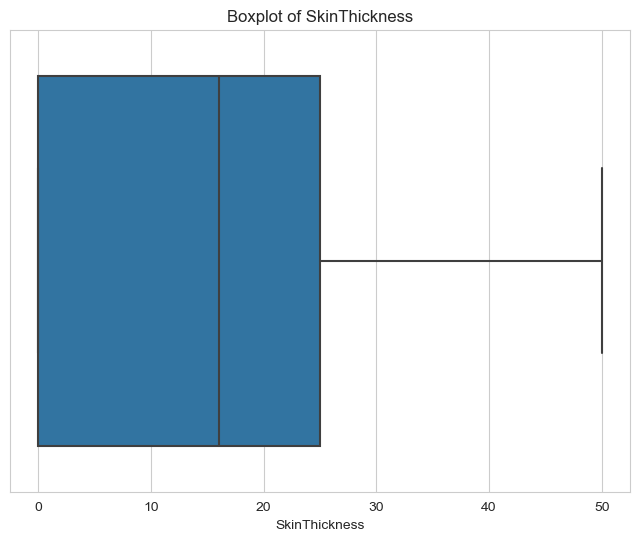

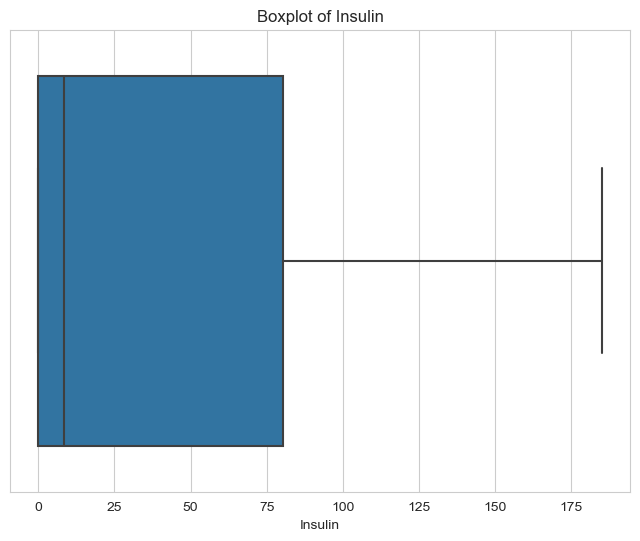

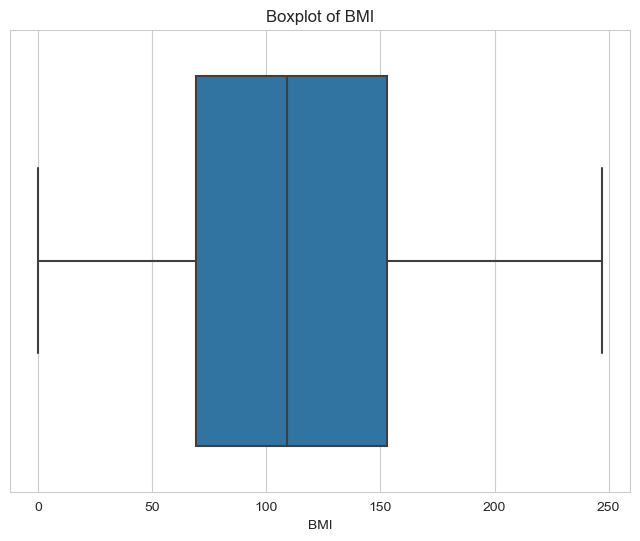

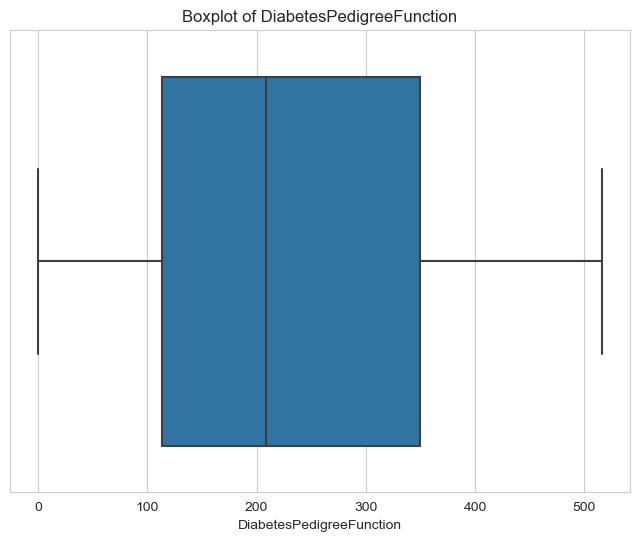

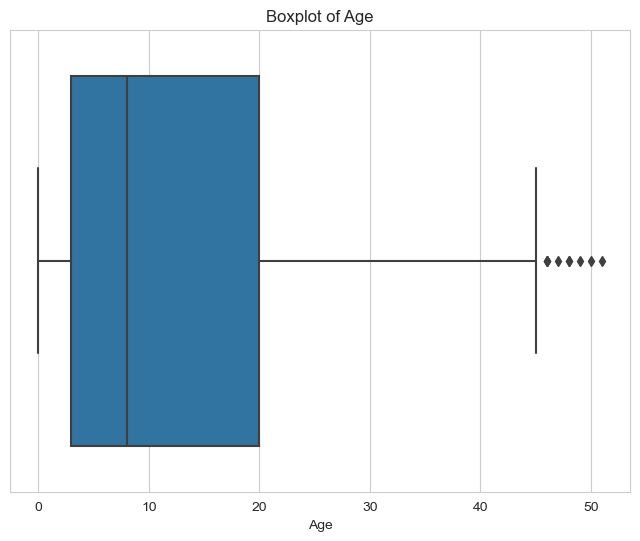

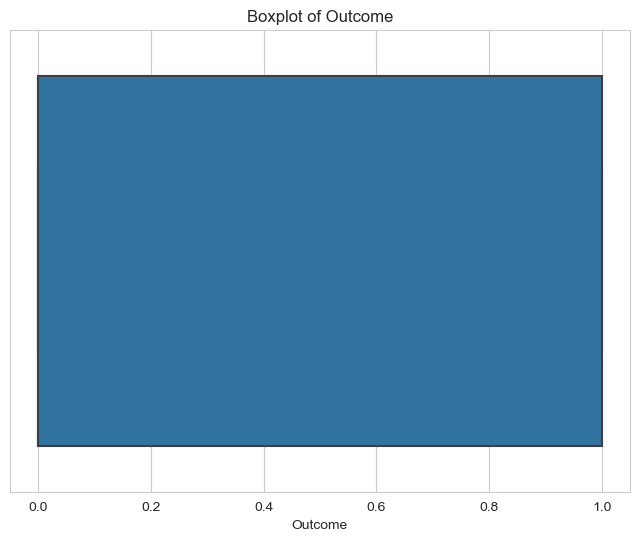

In [44]:
numerical_columns = dt.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dt[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col);

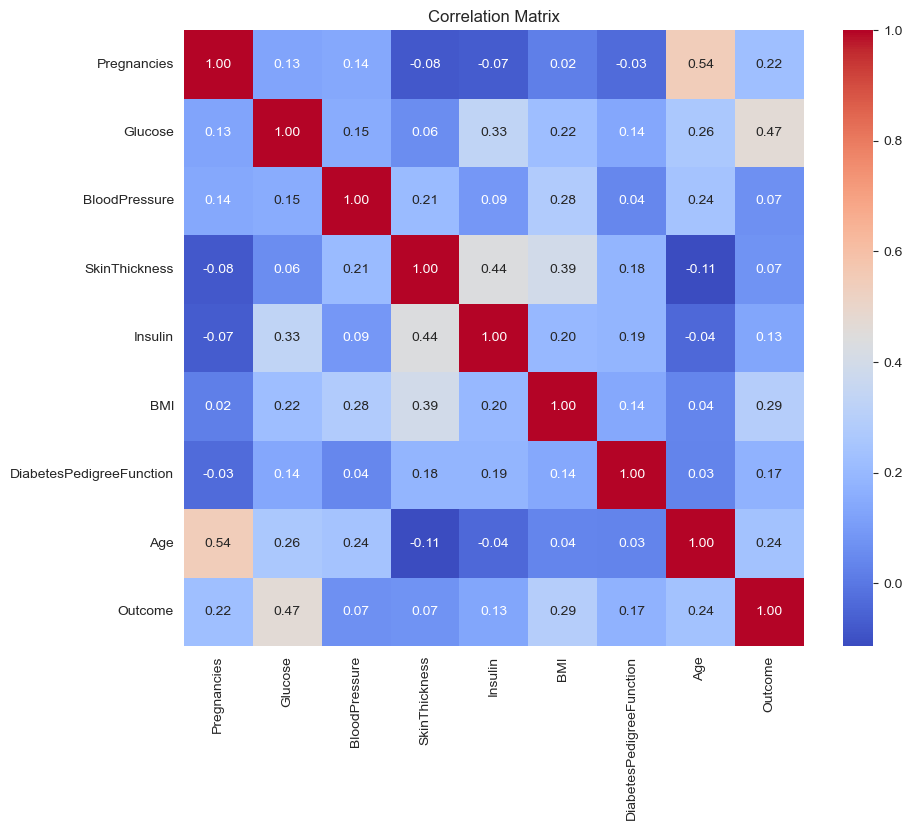

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

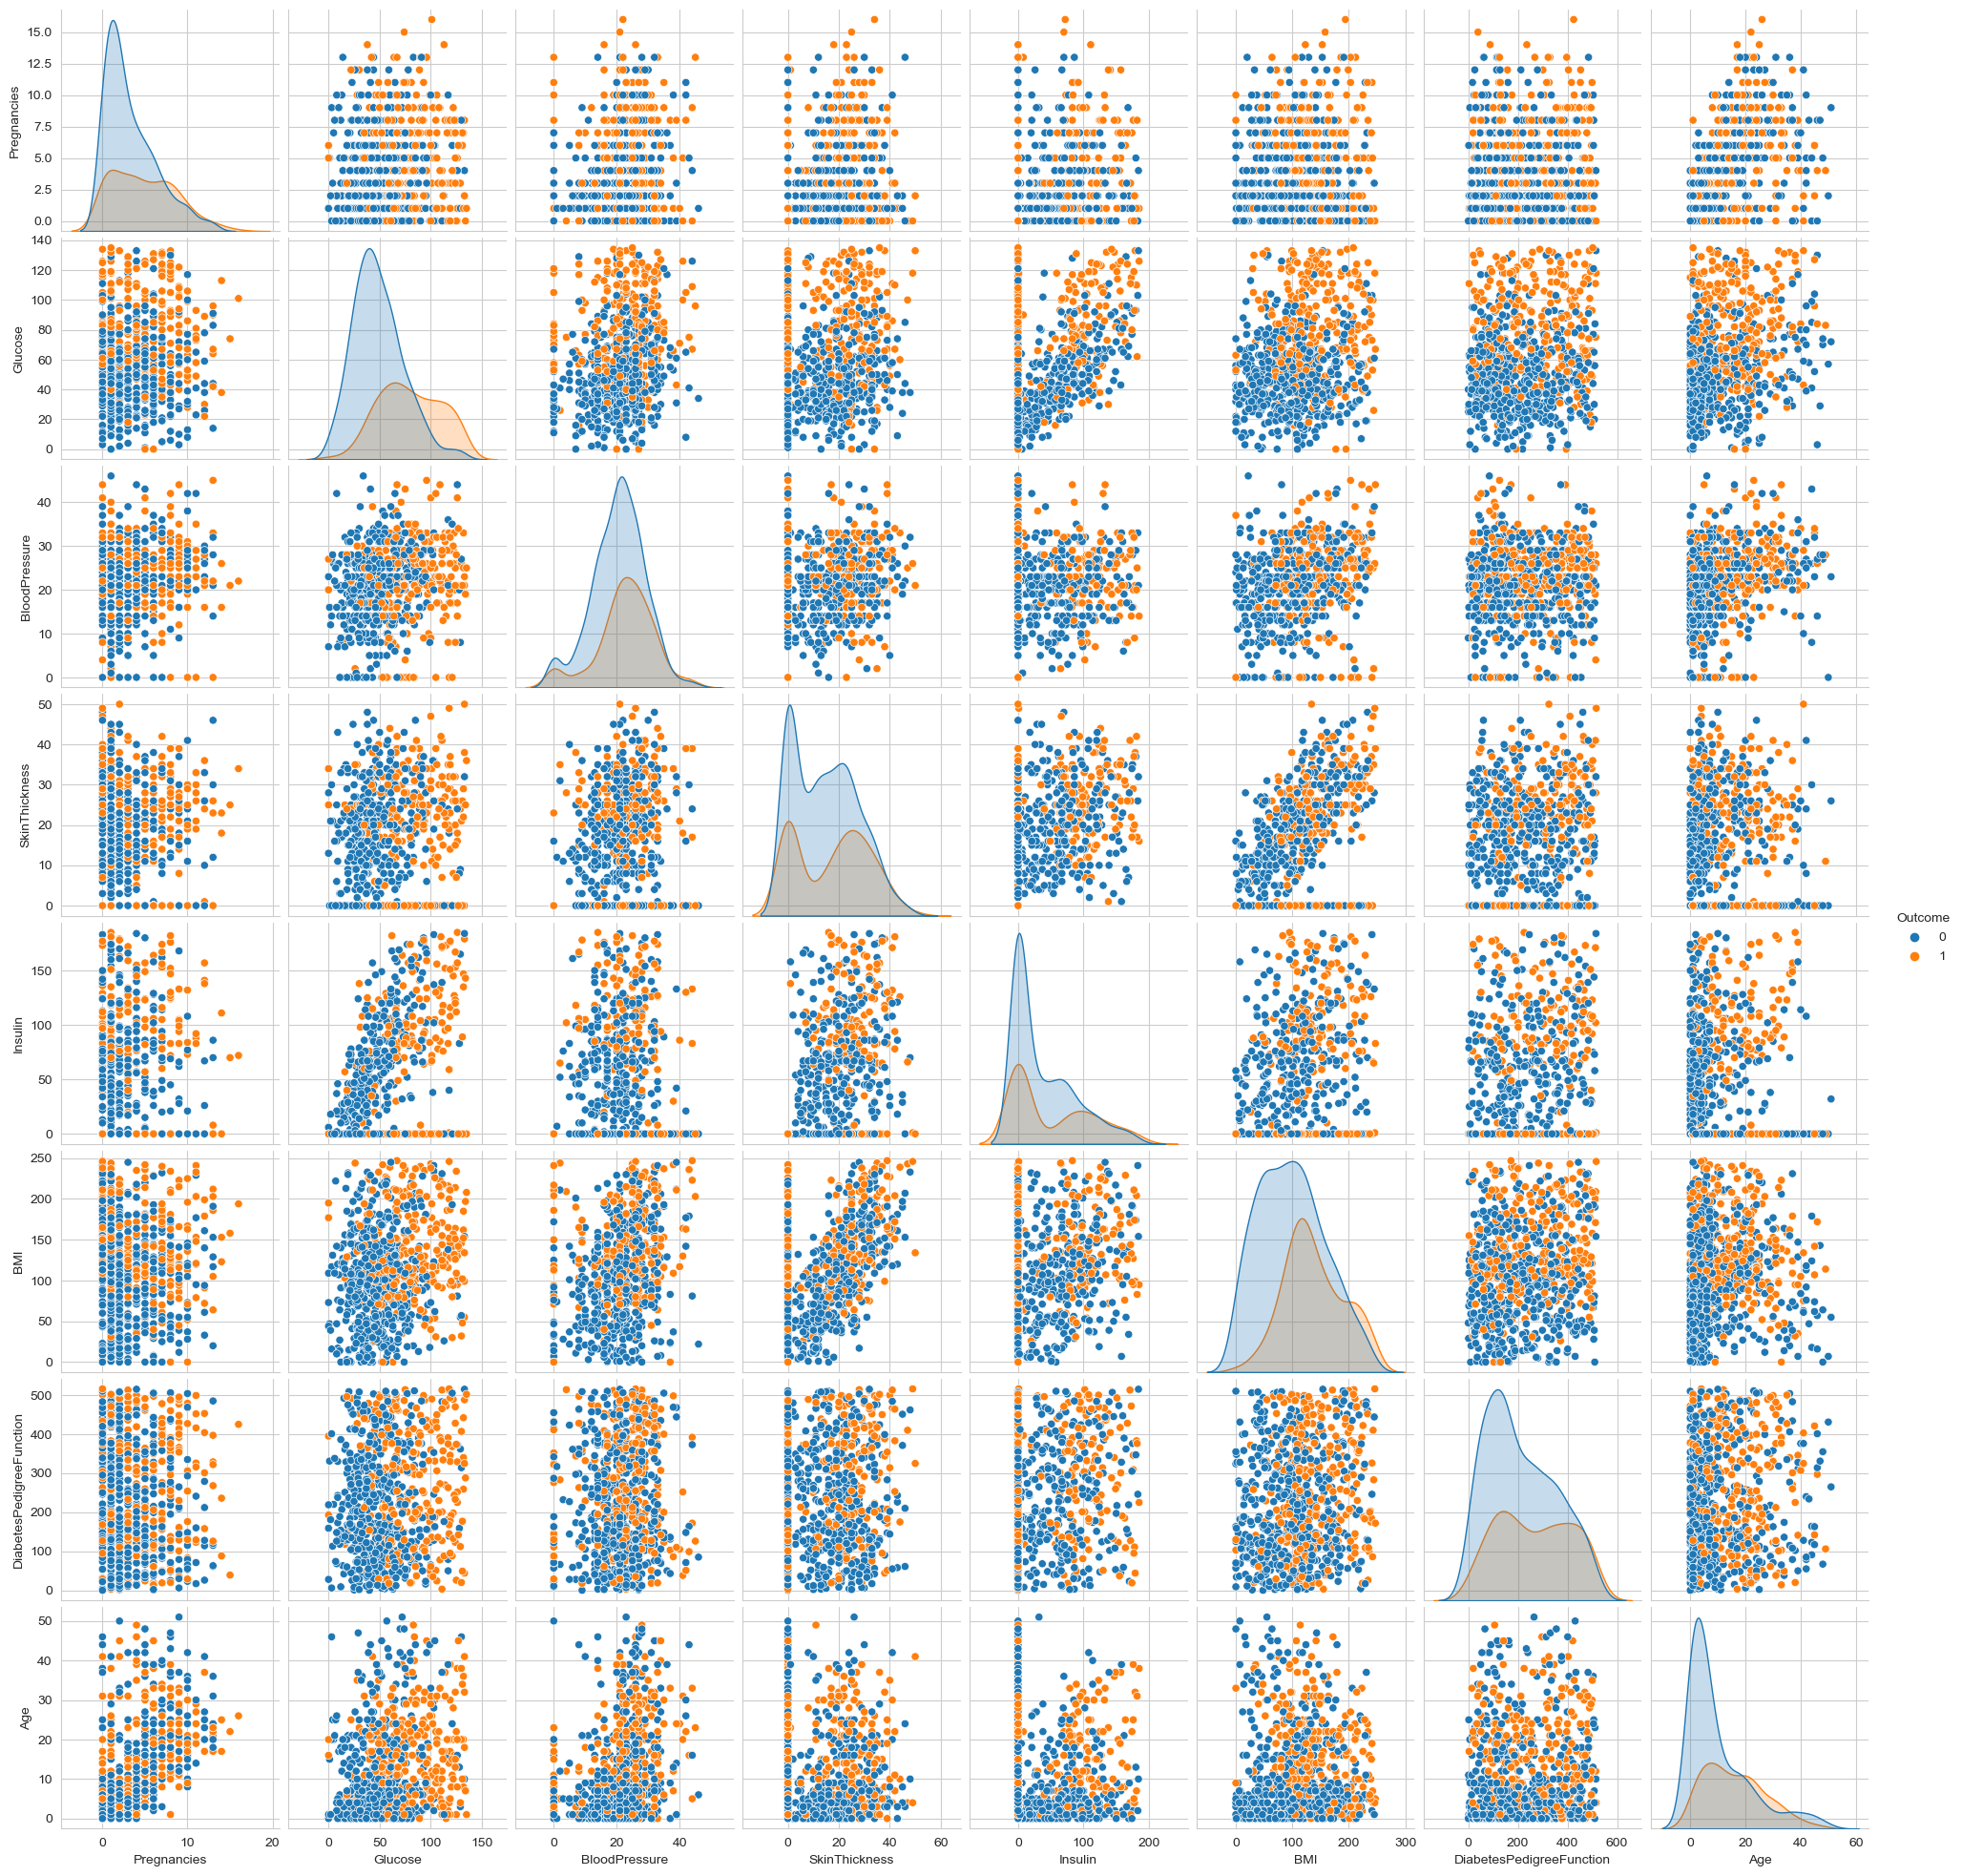

In [48]:
p = sns.pairplot(dt, hue="Outcome")

In [50]:
x = dt.drop(['Outcome'], axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,86,22,28,0,123,350,29
1,1,23,19,22,0,62,196,10
2,8,121,17,0,0,30,368,11
3,1,27,19,16,62,77,53,0
4,0,75,4,28,102,209,514,12


In [52]:
y = dt['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [58]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,22,0,0,0,0,163,0
618,9,50,28,17,0,78,495,29
346,1,77,6,12,52,83,361,1
294,0,99,8,0,0,18,123,44
231,6,72,27,30,164,229,109,25


In [60]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [62]:
log_reg = LogisticRegression()
dtc = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)
gbc = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

In [64]:
log_reg.fit(x_train, y_train)
dtc.fit(x_train, y_train)
clf.fit(x_train, y_train)
gbc.fit(x_train, y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)
gnb.fit(x_train, y_train)

GaussianNB()

In [66]:
log_reg_pred = log_reg.predict(x_test)
dtc_pred = dtc.predict(x_test)
clf_pred = clf.predict(x_test)
gbc_pred = gbc.predict(x_test)
svc_pred = svc.predict(x_test)
knn_pred = knn.predict(x_test)
gnb_pred = gnb.predict(x_test)

In [68]:
models = {
    'LogisticRegression': log_reg_pred,
    'DecisionTreeClassifier': dtc_pred,
    'RandomForestClassifier': clf_pred,
    'GradientBoostingClassifier': gbc_pred,
    'SVC': svc_pred,
    'KNeighborsClassifier': knn_pred,
    'GaussianNB': gnb_pred,
}

In [70]:
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print()

Model: LogisticRegression
Accuracy: 0.7468
Precision: 0.6429
Recall: 0.6545
F1 Score: 0.6486
Confusion Matrix:
 [[79 20]
 [19 36]]

Model: DecisionTreeClassifier
Accuracy: 0.7532
Precision: 0.6393
Recall: 0.7091
F1 Score: 0.6724
Confusion Matrix:
 [[77 22]
 [16 39]]

Model: RandomForestClassifier
Accuracy: 0.7468
Precision: 0.6333
Recall: 0.6909
F1 Score: 0.6609
Confusion Matrix:
 [[77 22]
 [17 38]]

Model: GradientBoostingClassifier
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549
Confusion Matrix:
 [[78 21]
 [18 37]]

Model: SVC
Accuracy: 0.7727
Precision: 0.7000
Recall: 0.6364
F1 Score: 0.6667
Confusion Matrix:
 [[84 15]
 [20 35]]

Model: KNeighborsClassifier
Accuracy: 0.6623
Precision: 0.5273
Recall: 0.5273
F1 Score: 0.5273
Confusion Matrix:
 [[73 26]
 [26 29]]

Model: GaussianNB
Accuracy: 0.7403
Precision: 0.6190
Recall: 0.7091
F1 Score: 0.6610
Confusion Matrix:
 [[75 24]
 [16 39]]



In [72]:
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators = i).fit(x_train,y_train)
    print(f'Model accuracy on test set : {clf.score(x_test,y_test) * 100: .2f}%')
    print(' ')

Trying model with 10 estimators...
Model accuracy on test set :  77.27%
 
Trying model with 20 estimators...
Model accuracy on test set :  72.73%
 
Trying model with 30 estimators...
Model accuracy on test set :  74.68%
 
Trying model with 40 estimators...
Model accuracy on test set :  72.73%
 
Trying model with 50 estimators...
Model accuracy on test set :  74.03%
 
Trying model with 60 estimators...
Model accuracy on test set :  75.97%
 
Trying model with 70 estimators...
Model accuracy on test set :  72.73%
 
Trying model with 80 estimators...
Model accuracy on test set :  74.68%
 
Trying model with 90 estimators...
Model accuracy on test set :  74.03%
 


In [76]:
import secrets

api_key = secrets.token_urlsafe(32)
print(f"Generated API Key: {api_key}")

Generated API Key: jEB384MAT86rmAWqRX0YB3ySX174UZqFfEwIgSOBqRc


In [78]:
pip install Flask flask-restful

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pickle
pickle.dump(svc, open('diabetes_model.pk1', 'wb'))

In [82]:
loaded_model = pickle.load(open('diabetes_model.pk1', 'rb'))
loaded_model.score(x_test, y_test)

0.7727272727272727